# Linear Regression Model

In [1]:
MODEL_NAME = 'linear-regression'

In [2]:
DAY_TO_PREDICT = 90
TEST_RATIOS = [0.1, 0.2, 0.3]
DATASET_LABELS = ['BIDV', 'EIB', 'VCB']
SELECTORS = [0,0] # ~test ratio 0.1, dataset BIDV

In [3]:
TRAIN_TEST_LABELS = []

for ratio in TEST_RATIOS:
    train_ratio = int((1 - ratio) * 10)
    test_ratio = int(ratio * 10)
    label = f'{train_ratio}-{test_ratio}'
    TRAIN_TEST_LABELS.append(label)

In [4]:
import pandas as pd
import numpy as np
import os

In [5]:
DATASETS = []

START_DATE = '2019-01-01'
END_DATE = '2024-06-01'

for label in DATASET_LABELS:
    dataset = f'{label}_{START_DATE}_{END_DATE}'
    DATASETS.append(dataset)

## Read & Process data

In [6]:
directory = '../../data/processed-data'
data_dict = {}

# Read all datasets in DATASET_LABELS
for dataset, lable in zip(DATASETS, DATASET_LABELS):
    file_name = f"{dataset}.processed-data.csv"
    file_path = os.path.join(directory, file_name)
    
    data = pd.read_csv(file_path)
    data_dict[lable] = data

In [7]:
def process_data(stock_data):
    # use Close price only
    df = pd.DataFrame({
        'ds': range(0, len(stock_data)),
        'y': stock_data['Close']
    }).reset_index(drop=True)

    return df

In [8]:
def split_train_test(df, test_ratio):
    # split by test_ratio
    n = len(df)
    test_size = int(test_ratio*n)
    
    X_train, X_test = df['ds'][:-test_size].values.reshape(-1, 1), df['ds'][-test_size:].values.reshape(-1, 1)
    y_train, y_test = df['y'][:-test_size], df['y'][-test_size:]
    
    return X_train, y_train, X_test, y_test

In [9]:
df = data_dict[DATASET_LABELS[SELECTORS[1]]] #BIDV dataset

In [10]:
df = process_data(df)

In [11]:
df

,ds,y
0,0,23636.232422
1,1,23636.232422
2,2,22577.892578
3,3,22260.392578
4,4,22789.560547
...,...,...
1409,1409,48900.000000
1410,1410,49100.000000
1411,1411,48600.000000
1412,1412,47700.000000


In [12]:
X_train, y_train, X_test, y_test = split_train_test(df, TEST_RATIOS[SELECTORS[0]])

## Train

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Predict test and future

In [14]:
# Test
y_pred = model.predict(X_test)

In [15]:
# future after test
last_index = df['ds'].max()
X_future = np.arange(last_index + 1, last_index + DAY_TO_PREDICT + 1).reshape(-1, 1)
y_future = model.predict(X_future)

## Evaluate accuracy

In [16]:
def evaluate_accuracy(y_test, y_pred):
    test_mae = np.mean(abs(y_pred - y_test))
    MAE = f'MAE: {test_mae}'

    test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))*100
    MAPE = f'MAPE: {test_mape}'

    test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
    RMSE = f'RMSE: {test_rmse}'

    #print
    max_length = max(len(RMSE), len(MAPE), len(MAE))

    print(f'{DATASET_LABELS[SELECTORS[1]]} {TRAIN_TEST_LABELS[SELECTORS[0]]}')
    print('=' * max_length)
    print(MAE)
    print(MAPE)
    print(RMSE)
    print('=' * max_length)

In [17]:
evaluate_accuracy(y_test, y_pred)

BIDV 9-1
MAE: 7897.059109583885
MAPE: 15.880996090180208
RMSE: 8821.146422060887


## Make plots

In [18]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.autolayout'] = True

COLORS = plt.get_cmap('tab10').colors

In [19]:
results_dir = '../../results/linear-regression/'
os.makedirs(results_dir, exist_ok=True)

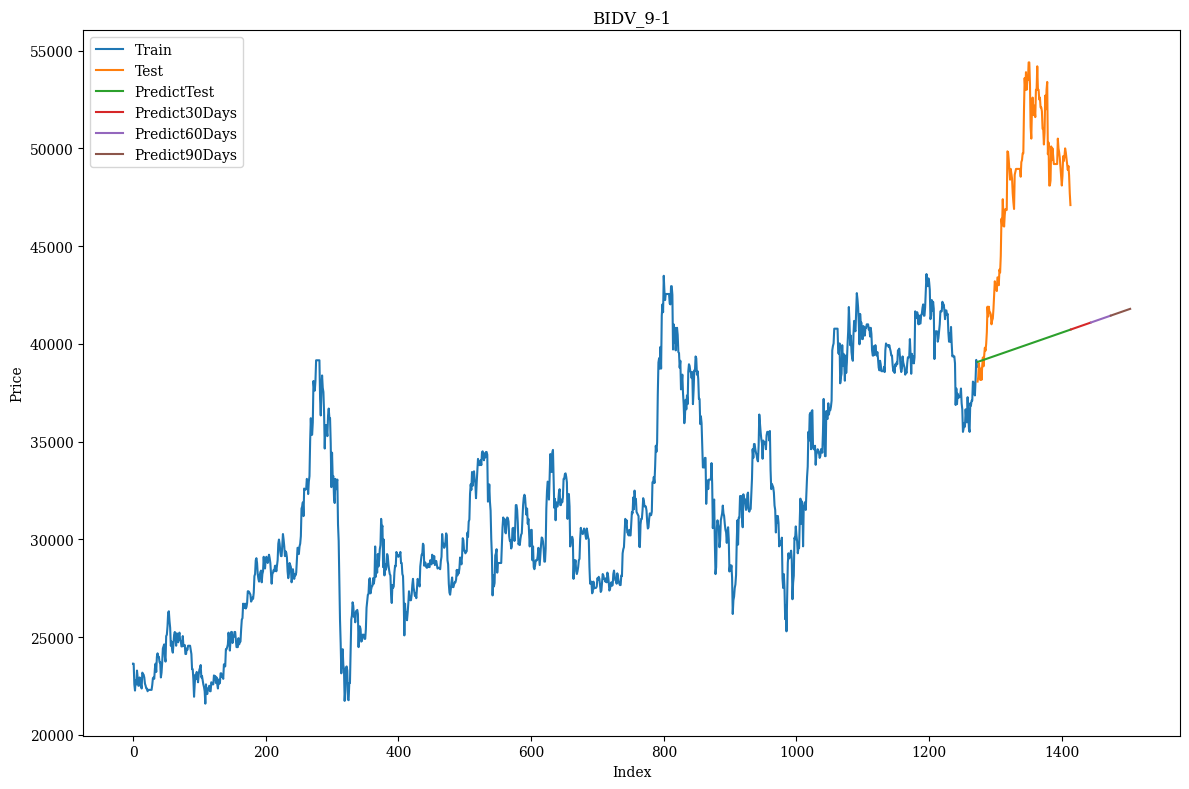

In [20]:
plt.plot(X_train, y_train, color=COLORS[0])
plt.plot(X_test, y_test, color=COLORS[1])
plt.plot(X_test, y_pred, color=COLORS[2])
plt.plot(X_future[0:30], y_future[0:30], color=COLORS[3])
plt.plot(X_future[30:60], y_future[30:60], color=COLORS[4])
plt.plot(X_future[60:90], y_future[60:90], color=COLORS[5])

figname = f'{DATASET_LABELS[SELECTORS[1]]}_{TRAIN_TEST_LABELS[SELECTORS[0]]}'
plt.title(figname)
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend(['Train','Test','PredictTest','Predict30Days','Predict60Days','Predict90Days'])

plt.savefig(f'../../results/{MODEL_NAME}/{MODEL_NAME}_{figname}.png')

plt.show()

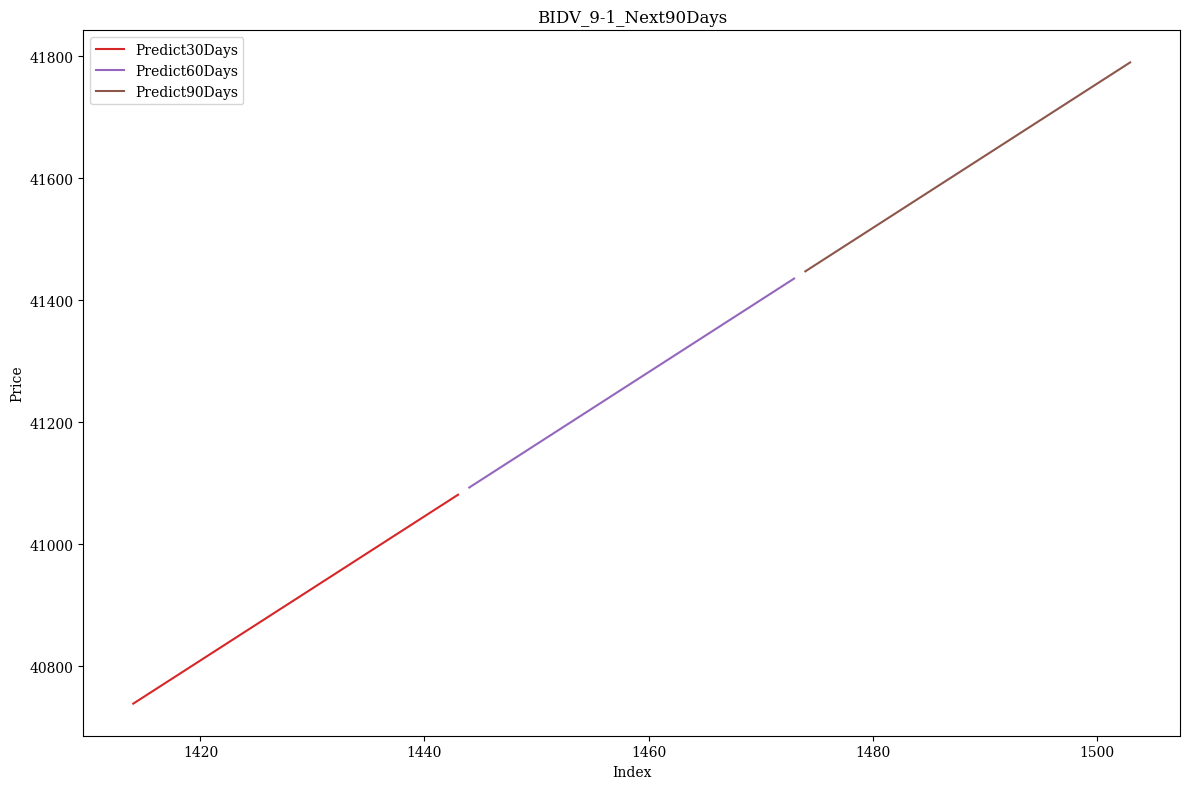

In [21]:
plt.plot(X_future[0:30], y_future[0:30], color=COLORS[3])
plt.plot(X_future[30:60], y_future[30:60], color=COLORS[4])
plt.plot(X_future[60:90], y_future[60:90], color=COLORS[5])

day_label = 'Days' if DAY_TO_PREDICT > 1 else 'Day'
figname = f'{DATASET_LABELS[SELECTORS[1]]}_{TRAIN_TEST_LABELS[SELECTORS[0]]}_Next{DAY_TO_PREDICT}{day_label}'
plt.title(figname)
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend(['Predict30Days','Predict60Days','Predict90Days'])

plt.savefig(f'../../results/{MODEL_NAME}/{MODEL_NAME}_{figname}.png')

plt.show()